### Kaggle competition:[Bag of Words Meets Bag of Popcore](https://www.kaggle.com/c/word2vec-nlp-tutorial)

Use Google's Word2Vec for movie reviews

Reference:

Kaggle tutorial: https://www.kaggle.com/c/word2vec-nlp-tutorial/overview

RandomForest: https://www.kaggle.com/sameerdev7/93-f-score-bag-of-words-m-bags-of-popcorn-with-rf/notebook

Bag of Words: https://www.kaggle.com/amitkvikram/bag-of-words/notebook

TFIDF & SVM : https://www.kaggle.com/snehabansod/bow-meets-bop-using-tfidf-and-svm/notebook

[Bigger Dataset-100k](https://www.kaggle.com/utathya/imdb-review-dataset)

In [2]:
import pandas as pd
train = pd.read_csv('../Dataset/word2vec-nlp/labeledTrainData.tsv',\
                    header=0, delimiter='\t', quoting=3)

In [3]:
train.shape
train.head(10)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."
5,"""8196_8""",1,"""I dont know why people think this is such a b..."
6,"""7166_2""",0,"""This movie could have been very good, but com..."
7,"""10633_1""",0,"""I watched this video at a friend's house. I'm..."
8,"""319_1""",0,"""A friend of mine bought this film for £1, and..."
9,"""8713_10""",1,"""<br /><br />This movie is full of references...."


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
id           25000 non-null object
sentiment    25000 non-null int64
review       25000 non-null object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [5]:
# take a look of one review
print(train['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

### 1. Data Cleaning and Text Processing

Here we use Beautiful Soup library.

In [6]:
from bs4 import BeautifulSoup             

# Initialize the BeautifulSoup object on a single movie review     
example1 = BeautifulSoup(train["review"][0])  

# Print the raw review and then the output of get_text(), for 
# comparison
# print(train["review"][0])
# print(example1.get_text())

Dealing with Punctuation, Numbers and Stopwords: NLTK and regular expressions

We'll ignore some punctuation like "!!!" or :) though they could carry sentiment

1) find anything that is not a-z or A-Z and replace it with space

2) convert reviews to lower_case and split into individual words(also called as tokenization in NLP lingo)

In [7]:
import re
letters_only = re.sub("[^a-zA-Z]", " ", example1.get_text()) 
lower_case = letters_only.lower()
words = lower_case.split()

3) we'll delete some frequently occuring words that don't carry much meaning: "Stop words" such as "a","is"....

Use nltk.download() to download nltk_data

default search path:

    - '/Users/jialeiwang/nltk_data'
    - '/anaconda3/nltk_data'
    - '/anaconda3/share/nltk_data'
    - '/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    
we can use nltk.data.path.append("path") to define your own nltk_data dir

In [8]:
import nltk
# nltk.download() # download text data sets, including stop words
nltk.data.path.append("../Dataset/nltk_data/")

In [19]:
from nltk.corpus import stopwords
print(stopwords.words("english")) # view the list of english-language

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
# Remove stop words from "words"
words = [w for w in words if not w in stopwords.words("english")]
print(words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

There're many other things we could do to the data- Porter Stemming and Lemmatizing(both availble in NLTK)

The code above is test code, we'll put it all together.Since we have 25000 reviews.

In [36]:
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))

# test code for review_to_words
clean_review = review_to_words(train["review"][0])
print(type(clean_review))

<class 'str'>


In [47]:
# Get the number of reviews based on the dataframe column size
num_reviews = train["review"].size

# Initialize an empty list to hold the clean reviews
clean_train_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 


# Maybe some parallel code can be used here
print("Cleaning and parsing the training set movie reviews...\n")
start_time = time.time()
for i in range( 0, num_reviews ):
    # If the index is evenly divisible by 1000, print a message
    if( (i+1)%1000 == 0 ):
        print("Review %d of %d\n" % ( i+1, num_reviews ))
    # Call our function for each one, and add the result to the list of
    # clean reviews
    clean_train_reviews.append( review_to_words( train["review"][i] ))
print(" ---%s seconds---" % (time.time()-start_time))

Cleaning and parsing the training set movie reviews...

 ---15.915326833724976 seconds---


In [51]:
import time
# turn python functions into pyspark functions(UDF)
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
spark = SparkSession \
    .builder \
    .appName("BOW-preprocessing") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df = spark.createDataFrame(train)
df.printSchema()

def review_to_words( raw_review ):
    review_text = BeautifulSoup(raw_review).get_text()        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops]   
    return( " ".join( meaningful_words ))

start_time = time.time()
spark_preprocessing = udf(lambda z:review_to_words(z), StringType())
df_after = df.select('id', 'sentiment', spark_preprocessing('review'))
df_after.show()
print(" ---%s seconds---" % (time.time()-start_time))
print(df.count())

root
 |-- id: string (nullable = true)
 |-- sentiment: long (nullable = true)
 |-- review: string (nullable = true)

+---------+---------+--------------------+
|       id|sentiment|    <lambda>(review)|
+---------+---------+--------------------+
| "5814_8"|        1|stuff going momen...|
| "2381_9"|        1|classic war world...|
| "7759_3"|        0|film starts manag...|
| "3630_4"|        0|must assumed prai...|
| "9495_8"|        1|superbly trashy w...|
| "8196_8"|        1|dont know people ...|
| "7166_2"|        0|movie could good ...|
|"10633_1"|        0|watched video fri...|
|  "319_1"|        0|friend mine bough...|
|"8713_10"|        1|movie full refere...|
| "2486_3"|        0|happens army wetb...|
|"6811_10"|        1|although generall...|
|"11744_9"|        1|mr harvey lights ...|
| "7369_1"|        0|feeling submerged...|
|"12081_1"|        0|note george litma...|
| "3561_4"|        0|stephen king adap...|
| "4489_1"|        0|matrix exciting s...|
| "3951_2"|        0|ul

### 2. Creating Features from a Bag of Words
Using scikit-learn and **Bag of words**

In the IMDB data, we have a very large number of reviews, which will give us a large vocabulary. To limit the size of the feature vectors, we should choose some maximum vocabulary size. Below, we use the 5000 most frequent words (remembering that stop words have already been removed).

We'll be using the feature_extraction module from scikit-learn to create bag-of-words features. 

In [13]:
print("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

Creating the bag of words...



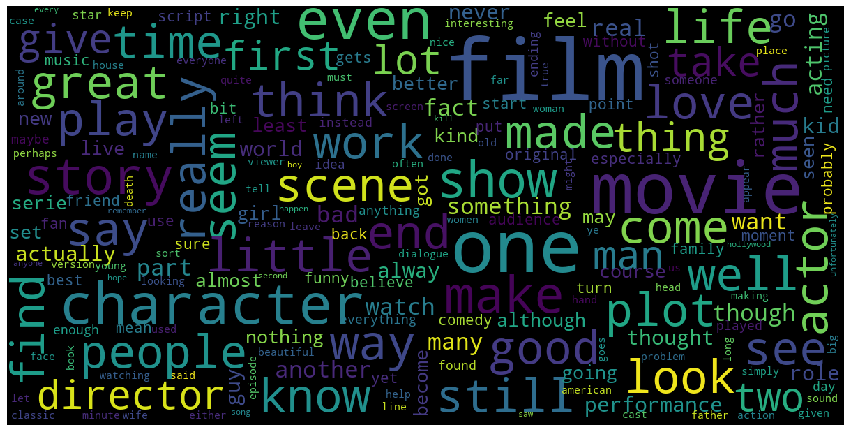

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(clean_train_reviews)

In [15]:
# It has 25,000 rows and 5,000 features (one for each vocabulary word)
print(train_data_features.shape)

(25000, 5000)


In [16]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
# print(vocab)
import numpy as np

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set

# for tag, count in zip(vocab, dist):
    # print(count, tag)

### 3.1 TFIDF+SVM

In [23]:
# Read the test data
test = pd.read_csv("../Dataset/word2vec-nlp/testData.tsv", header=0, delimiter="\t", \
                   quoting=3 )

# Verify that there are 25,000 rows and 2 columns
print(test.shape)

# Create an empty list and append the clean reviews one by one
num_reviews = len(test["review"])
clean_test_reviews = [] 

print("Cleaning and parsing the test set movie reviews...\n")
for i in range(0,num_reviews):
    if( (i+1) % 1000 == 0 ):
        print("Review %d of %d\n" % (i+1, num_reviews))
    clean_review = review_to_words( test["review"][i] )
    clean_test_reviews.append( clean_review )

(25000, 2)
Cleaning and parsing the test set movie reviews...

Review 1000 of 25000

Review 2000 of 25000

Review 3000 of 25000

Review 4000 of 25000

Review 5000 of 25000

Review 6000 of 25000

Review 7000 of 25000

Review 8000 of 25000

Review 9000 of 25000

Review 10000 of 25000

Review 11000 of 25000

Review 12000 of 25000

Review 13000 of 25000

Review 14000 of 25000

Review 15000 of 25000

Review 16000 of 25000

Review 17000 of 25000

Review 18000 of 25000

Review 19000 of 25000

Review 20000 of 25000

Review 21000 of 25000

Review 22000 of 25000

Review 23000 of 25000

Review 24000 of 25000

Review 25000 of 25000



In [24]:
from sklearn.feature_extraction.text import TfidfTransformer

test_data_features = vectorizer.transform(clean_test_reviews)            #Vectorize Test Data
test_data_features = test_data_features.toarray()

tfidf_transformer = TfidfTransformer().fit(train_data_features)       #  TFIDF
messages_tfidf = tfidf_transformer.transform(train_data_features)
test_tfidf=tfidf_transformer.transform(test_data_features)

from sklearn.svm import SVC, LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(messages_tfidf, train['sentiment'])                  # SVM
pred = linear_svc.predict(test_tfidf)

In [25]:
acc_linear_svc = round(linear_svc.score(messages_tfidf, train['sentiment']) * 100, 2)
print(acc_linear_svc)

94.66


In [26]:
final_result = pd.DataFrame( data={"id":test["id"], "sentiment":pred})
final_result.to_csv('Bag_of_Words_SVM.csv', index=False, quoting=3)

Metric
Submissions are judged on area under the ROC curve.

This model's score is 0.86400

### 3.2 Random Forest

In [27]:
from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(train_data_features,train["sentiment"],test_size=0.2,random_state=0)
print("Splitting Done")

Splitting Done


In [28]:
print("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( train_data_features, train["sentiment"] )

Training the random forest...


In [29]:
# Read the test data
test = pd.read_csv("../Dataset/word2vec-nlp/testData.tsv", header=0, delimiter="\t", \
                   quoting=3 )

# Verify that there are 25,000 rows and 2 columns
print(test.shape)

# Create an empty list and append the clean reviews one by one
num_reviews = len(test["review"])
clean_test_reviews = [] 

print("Cleaning and parsing the test set movie reviews...\n")
for i in range(0,num_reviews):
    if( (i+1) % 1000 == 0 ):
        print("Review %d of %d\n" % (i+1, num_reviews))
    clean_review = review_to_words( test["review"][i] )
    clean_test_reviews.append( clean_review )

# Get a bag of words for the test set, and convert to a numpy array
test_data_features = vectorizer.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

# Use the random forest to make sentiment label predictions
result = forest.predict(test_data_features)

# Copy the results to a pandas dataframe with an "id" column and
# a "sentiment" column
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )

# Use pandas to write the comma-separated output file
output.to_csv( "Bag_of_Words_model.csv", index=False, quoting=3 )

(25000, 2)
Cleaning and parsing the test set movie reviews...

Review 1000 of 25000

Review 2000 of 25000

Review 3000 of 25000

Review 4000 of 25000

Review 5000 of 25000

Review 6000 of 25000

Review 7000 of 25000

Review 8000 of 25000

Review 9000 of 25000

Review 10000 of 25000

Review 11000 of 25000

Review 12000 of 25000

Review 13000 of 25000

Review 14000 of 25000

Review 15000 of 25000

Review 16000 of 25000

Review 17000 of 25000

Review 18000 of 25000

Review 19000 of 25000

Review 20000 of 25000

Review 21000 of 25000

Review 22000 of 25000

Review 23000 of 25000

Review 24000 of 25000

Review 25000 of 25000



#### Metric
Submissions are judged on area under the ROC curve. 

This model's score is **0.844**

### 3.3 Logistic Regression
TODO

In [30]:
from sklearn.linear_model import LogisticRegression



### Naive Bayes
TODO